In [142]:
import random
import torch
from d2l import torch as d2l

In [143]:
def systhetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [144]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = systhetic_data(true_w, true_b, 1000)

In [145]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.6104, -1.3757]) 
label: tensor([10.0981])


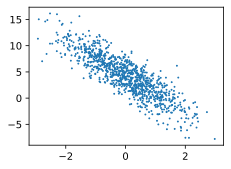

In [146]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [147]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    print(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [148]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [149]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [150]:
def squared_loss(y_hat, y):
    # return (y_hat - y.reshape(y_hat.shape))**2 / 2
    return (y_hat - y)**2 / 2

In [151]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [152]:
batch_size = 10
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

[994, 327, 129, 471, 544, 564, 727, 566, 456, 848, 1, 20, 524, 972, 423, 718, 779, 713, 138, 510, 79, 764, 475, 128, 476, 173, 363, 698, 80, 963, 237, 433, 776, 745, 741, 275, 873, 483, 850, 611, 463, 947, 991, 424, 207, 956, 916, 281, 267, 74, 122, 76, 868, 884, 313, 83, 801, 861, 217, 588, 174, 604, 209, 552, 132, 680, 914, 153, 384, 832, 319, 536, 294, 870, 652, 223, 811, 710, 154, 350, 95, 426, 121, 230, 642, 539, 51, 569, 946, 942, 268, 216, 810, 415, 39, 538, 503, 472, 557, 708, 548, 393, 3, 857, 608, 264, 523, 492, 875, 827, 722, 145, 467, 813, 67, 908, 149, 447, 939, 601, 65, 501, 314, 822, 855, 902, 388, 849, 529, 898, 657, 756, 110, 531, 278, 581, 50, 747, 344, 448, 265, 575, 829, 13, 977, 900, 29, 85, 911, 238, 568, 441, 385, 952, 774, 888, 705, 769, 131, 806, 66, 276, 69, 959, 951, 899, 830, 338, 256, 563, 461, 978, 525, 26, 354, 818, 961, 104, 342, 434, 781, 616, 322, 775, 882, 30, 906, 842, 254, 812, 160, 583, 973, 429, 528, 595, 937, 272, 282, 587, 706, 361, 163, 572, 78

In [153]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 1.2314e-04, -2.0981e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0005], grad_fn=<RsubBackward1>)
